<a href="https://colab.research.google.com/github/JMandal02/Data-Science_pwskills/blob/main/CNN_Architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Question 1  
**What is the role of filters and feature maps in Convolutional Neural
Network (CNN)?**

**Answer:**  

In a Convolutional Neural Network (CNN), **filters (kernels)** and **feature maps** are fundamental components responsible for automatic feature extraction from input data such as images.

**Filters (Kernels):**  
A filter is a small matrix of learnable weights (for example, 3×3 or 5×5) that slides over the input image. Each filter is designed to detect a specific type of feature such as edges, corners, textures, or patterns. During convolution, the filter performs element-wise multiplication with the input region and produces a single output value.

**Feature Maps:**  
The result of applying a filter over the entire input image is called a **feature map**. Each feature map highlights the presence and location of the specific feature detected by the filter. Multiple filters generate multiple feature maps, allowing the CNN to learn various features simultaneously.

**Role in CNN:**  
- Enable automatic feature extraction
- Preserve spatial relationships in images
- Reduce manual feature engineering
- Help the network learn hierarchical features (low-level to high-level)

Thus, filters act as feature detectors, and feature maps store the detected features across the image.


### Question 2  
**Explain the concepts of padding and stride in CNNs(Convolutional Neural
Network). How do they affect the output dimensions of feature maps?**

**Answer:**  

**Padding:**  
Padding refers to adding extra pixels (usually zeros) around the border of the input image before applying convolution. Padding helps control the spatial size of the output feature map.

Types of padding:
- **Valid padding:** No padding; output size decreases
- **Same padding:** Padding added so output size remains the same as input

**Stride:**  
Stride defines the number of pixels by which the filter moves over the input image.  
- Stride = 1 → filter moves one pixel at a time
- Stride > 1 → filter skips pixels, reducing output size

**Effect on Output Dimensions:**  
The output size of a feature map is calculated as:

$$\text{Output} = \frac{N - F + 2P}{S} + 1$$

Where:  
- \(N\) = input size  
- \(F\) = filter size  
- \(P\) = padding  
- \(S\) = stride  

**Impact:**  
- Padding preserves spatial information  
- Larger stride reduces feature map size and computation  
- Proper choice balances accuracy and efficiency


### Question 3  
**Define receptive field in the context of CNNs. Why is it important for deep
architectures?**

**Answer:**  

The **receptive field** of a neuron in a CNN refers to the region of the input image that influences that neuron's output.

In early layers, neurons have small receptive fields and capture local features like edges. As the network goes deeper, receptive fields grow larger, enabling neurons to capture more global and complex features such as objects or shapes.

**Importance in Deep Architectures:**  
- Enables hierarchical feature learning  
- Helps capture context and spatial dependencies  
- Larger receptive fields allow understanding of entire objects  
- Improves performance in complex image recognition tasks  

Deep CNNs rely on increasing receptive fields to move from low-level to high-level understanding.


### Question 4  
**Discuss how filter size and stride influence the number of parameters in a
CNN.**

**Answer:**  

**Filter Size:**  
Larger filters contain more weights, increasing the number of trainable parameters.  
For example:
- 3×3 filter → 9 parameters per channel
- 5×5 filter → 25 parameters per channel

**Stride:**  
Stride does not directly affect the number of parameters but impacts the output feature map size. Larger strides reduce spatial dimensions, lowering computation in subsequent layers.

**Parameter Formula:**  
$$\text{Parameters} = ((\text{Filter Height} \times \text{Filter Width} \times \text{Input Channels}) + 1) \times \text{Number of Filters}$$

**Impact Summary:**  
- Larger filters → more parameters and higher computational cost  
- Smaller filters (e.g., 3×3) are preferred for efficiency  
- Higher stride → reduced feature map size and faster computation  

Modern CNNs use small filters with deeper architectures for better performance.


### Question 5  
**Compare and contrast different CNN-based architectures like LeNet,
AlexNet, and VGG in terms of depth, filter sizes, and performance.**

**Answer:**  

| Architecture | Depth | Filter Size | Performance |
|-------------|------|-------------|------------|
| LeNet | Shallow (5 layers) | Large (5×5) | Suitable for simple datasets like MNIST |
| AlexNet | Medium (8 layers) | Mixed (11×11, 5×5, 3×3) | Breakthrough performance on ImageNet |
| VGG | Deep (16–19 layers) | Small (3×3) | High accuracy, high computation |

**Key Differences:**  
- LeNet is simple and lightweight  
- AlexNet introduced ReLU, dropout, and GPU training  
- VGG focuses on depth with uniform small filters  

VGG achieves better accuracy at the cost of higher memory and computation.


### Question 6  
**Using keras, build and train a simple CNN model on the MNIST dataset
from scratch. Include code for module creation, compilation, training, and evaluation.**

**Answer:**  

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Starting training...
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.7725 - loss: 0.7388 - val_accuracy: 0.9755 - val_loss: 0.0853
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9612 - loss: 0.1247 - val_accuracy: 0.9855 - val_loss: 0.0579
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9721 - loss: 0.0928 - val_accuracy: 0.9867 - val_loss: 0.0502
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9768 - loss: 0.0729 - val_accuracy: 0.9888 - val_loss: 0.0444
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9799 - loss: 0.0668 - val_accuracy: 0.9897 - val_loss: 0.0402
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9808 - loss: 0.0618 - val_accuracy: 0.9892 - val_loss: 0.0359
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9842 - loss: 0.0519 - val_accuracy: 0.9910 - val_loss: 0.0361
Epoch 8/10
422/422 ━━━━━━━━━━━━

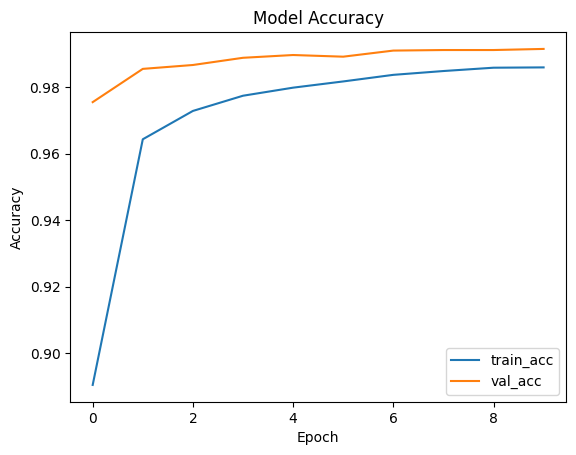

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

# 1. Load and Preprocess Data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize pixel values to [0, 1] and add channel dimension (28, 28, 1)
x_train = np.expand_dims(x_train.astype("float32") / 255, -1)
x_test = np.expand_dims(x_test.astype("float32") / 255, -1)

# One-hot encode the labels (0-9)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# 2. Build the CNN Model
model = keras.Sequential([
    keras.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax"),
])

# 3. Compile and Train
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

print("Starting training...")
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.1, verbose=1)

# 4. Evaluate and Plot Results
score = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest loss: {score[0]:.4f}")
print(f"Test accuracy: {score[1]:.4f}")

# Optional: Plot training history
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Question 7  
**Load and preprocess the CIFAR-10 dataset using Keras, and create a
CNN model to classify RGB images. Show your preprocessing and architecture.**

**Answer:**  


In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# 1. Load and Preprocess Data
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# 2. Define the Architecture
model = models.Sequential([
    # First Convolutional Block
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # Second Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Third Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Classification Head
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10) # 10 output classes for CIFAR-10
])

# 3. Compile and Train
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

print("Starting training on CIFAR-10...")
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# 4. Summary of Model
model.summary()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Starting training on CIFAR-10...
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.3622 - loss: 1.7292 - val_accuracy: 0.5512 - val_loss: 1.2481
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5760 - loss: 1.1920 - val_accuracy: 0.6157 - val_loss: 1.0853
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6407 - loss: 1.0102 - val_accuracy: 0.6203 - val_loss: 1.0845
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6814 - loss: 0.9080 - val_accuracy: 0.6693 - val_loss: 0.9410
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7137 - loss: 0.8100 - val_accuracy: 0.6687 - val_loss: 0.9369
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7356 - loss: 0.7562 - val_accuracy: 0.6908 - val_loss: 0.8958
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7545 - loss: 0.7005 - val_accuracy: 0.7003 - val_loss: 0.8928
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 367,712 (1.40 MB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 245,142 (957.59 KB)

### Question 8  
**Using PyTorch, write a script to define and train a CNN on the MNIST
dataset. Include model definition, data loaders, training loop, and accuracy evaluation.**

**Answer:**

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# 1. Define the CNN Architecture
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # Formula: Output = ((N - F + 2P) / S) + 1
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3) # In: 28x28, Out: 26x26
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3) # In: 13x13 (after pool), Out: 11x11
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 5 * 5, 128) # After 2 pools, 28->13->5
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 5 * 5) # Flatten
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 2. Setup Data, Device, and Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

train_loader = DataLoader(datasets.MNIST('./data', train=True, download=True, transform=transform), batch_size=64, shuffle=True)
test_loader = DataLoader(datasets.MNIST('./data', train=False, transform=transform), batch_size=1000)

model = SimpleCNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# 3. Training Loop
def train(epochs):
    model.train()
    for epoch in range(epochs):
        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

            if batch_idx % 100 == 0:
                print(f'Epoch {epoch} [{batch_idx*len(data)}/{len(train_loader.dataset)}] Loss: {loss.item():.4f}')

# 4. Evaluation
def test():
    model.eval()
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
    print(f'\nTest Accuracy: {100. * correct / len(test_loader.dataset):.2f}%')

train(3)
test()

100%|██████████| 9.91M/9.91M [00:00<00:00, 15.7MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 426kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.97MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 13.3MB/s]


Epoch 0 [0/60000] Loss: 2.3168
Epoch 0 [6400/60000] Loss: 0.0957
Epoch 0 [12800/60000] Loss: 0.0764
Epoch 0 [19200/60000] Loss: 0.0409
Epoch 0 [25600/60000] Loss: 0.1078
Epoch 0 [32000/60000] Loss: 0.0698
Epoch 0 [38400/60000] Loss: 0.0240
Epoch 0 [44800/60000] Loss: 0.0576
Epoch 0 [51200/60000] Loss: 0.1086
Epoch 0 [57600/60000] Loss: 0.0490
Epoch 1 [0/60000] Loss: 0.0356
Epoch 1 [6400/60000] Loss: 0.0401
Epoch 1 [12800/60000] Loss: 0.0236
Epoch 1 [19200/60000] Loss: 0.0139
Epoch 1 [25600/60000] Loss: 0.0842
Epoch 1 [32000/60000] Loss: 0.0604
Epoch 1 [38400/60000] Loss: 0.0032
Epoch 1 [44800/60000] Loss: 0.0279
Epoch 1 [51200/60000] Loss: 0.0320
Epoch 1 [57600/60000] Loss: 0.0237
Epoch 2 [0/60000] Loss: 0.0206
Epoch 2 [6400/60000] Loss: 0.0136
Epoch 2 [12800/60000] Loss: 0.0496
Epoch 2 [19200/60000] Loss: 0.0088
Epoch 2 [25600/60000] Loss: 0.0310
Epoch 2 [32000/60000] Loss: 0.0414
Epoch 2 [38400/60000] Loss: 0.0183
Epoch 2 [44800/60000] Loss: 0.0092
Epoch 2 [51200/60000] Loss: 0.0049


### Question 9  
**Given a custom image dataset stored in a local directory, write code using
Keras ImageDataGenerator to preprocess and train a CNN model.**

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

# 1. Setup Generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    validation_split=0.2  # Automatic splitting
)

# Flow from the downloaded directory
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# 2. Build CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

# 3. Compile and Train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("Training on local directory...")
model.fit(train_generator, epochs=5, validation_data=validation_generator)

# 4. Summary of Model
model.summary()


Found 2936 images belonging to 1 classes.
Found 734 images belonging to 1 classes.
Training on local directory...
Epoch 1/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 28s 278ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 23s 254ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 23s 254ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 23s 255ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 23s 254ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │     5,308,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,983,813 (60.97 MB)

 Trainable params: 5,327,937 (20.32 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,655,876 (40.65 MB)

### Question  
**You are working on a web application for a medical imaging startup. Your task is to build and deploy a CNN model that classifies chest X-ray images into “Normal” and “Pneumonia” categories. Describe your end-to-end approach—from data preparation and model training to deploying the model as a web app using Streamlit.**

**Answer:**  

The development of a chest X-ray classification system using a Convolutional Neural Network (CNN) involves a complete end-to-end pipeline, starting from data preparation to deployment as a web application using Streamlit.

---

### 1. Data Collection and Preparation  

Chest X-ray images are collected from reliable medical datasets or hospital repositories and labeled into two categories: **Normal** and **Pneumonia**.  
The dataset is organized in a directory structure suitable for deep learning frameworks:


This structure allows automatic label assignment during training.

### **Dataset Directory Structure**
This structure allows automatic label assignment during training:

```text
dataset/
├── train/
│   ├── Normal/
│   └── Pneumonia/
├── validation/
│   ├── Normal/
│   └── Pneumonia/
└── test/
    ├── Normal/
    └── Pneumonia/
```

### 2. Data Preprocessing and Augmentation  

Medical images vary in resolution, brightness, and quality. To improve model robustness, preprocessing is applied:
- Resizing images to a fixed size (e.g., 224×224)
- Normalizing pixel values to the range [0, 1]
- Applying data augmentation such as rotation, zoom, and horizontal flipping  

Keras `ImageDataGenerator` is used to handle preprocessing and augmentation efficiently.

---

### 3. CNN Model Design and Training  

A CNN model is designed to extract spatial features from chest X-ray images.  
The architecture typically includes:
- Convolutional layers with ReLU activation for feature extraction  
- MaxPooling layers to reduce spatial dimensions  
- Fully connected Dense layers for classification  
- A Sigmoid output layer for binary classification  

The model is compiled using:
- **Loss function:** Binary Crossentropy  
- **Optimizer:** Adam  
- **Evaluation metric:** Accuracy  

Training is performed on the training dataset, while validation data is used to monitor performance and avoid overfitting.

---

### 4. Model Evaluation and Optimization  

The trained model is evaluated on unseen test data using:
- Accuracy
- Precision and Recall
- Confusion Matrix  

Performance can be further improved using techniques such as dropout, batch normalization, or transfer learning with pretrained models like MobileNet or ResNet.  
After final tuning, the trained model is saved as a `.h5` file.

---

### 5. Streamlit Web Application Development  

Streamlit is used to build an interactive web interface.  
The application allows users to:
- Upload chest X-ray images  
- Automatically preprocess the uploaded image  
- Load the trained CNN model  
- Display prediction results as **Normal** or **Pneumonia** along with confidence score  

This provides real-time inference in a user-friendly manner.

---

### 6. Deployment  

The Streamlit application is deployed using platforms such as **Streamlit Cloud** or cloud services like AWS or Azure.  
Deployment steps include:
- Creating a `requirements.txt` file  
- Uploading the trained model and app script  
- Hosting the application for public or internal access  

